In [1]:
import json
import pandas as pd
import numpy as np
import re

In [6]:
data = pd.read_csv (r'C:\Users\Vincent\Desktop\nvia.csv')
df = pd.DataFrame(data)
#c=close,o=open,h=high,l=low,v=volumedf.columns = ['Date','c', 'o', 'h', 'l', 'v','Change']

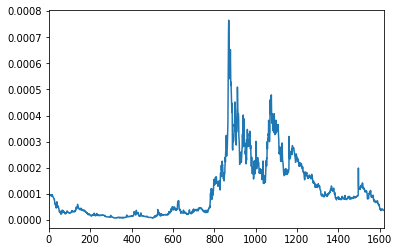

In [44]:
vin = []
for i in range(len(vio)-1, 0, -1):
    vin.append(vio[i])
data['vin'] = None
for i in range(len(vin)):
    data['vin'].iloc[i] = vin[i]
data['vin'].fillna(method='ffill',inplace=True)
via = data['vin'].astype('float')
via.plot()

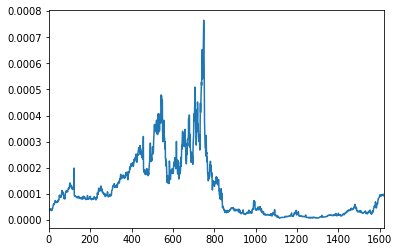

In [31]:
k = data['o'].iloc[::-1]
vio = k.astype('float')
vio.plot()

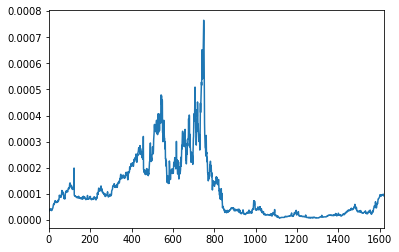

In [28]:
vio = o.astype('float')
vio.plot()

In [8]:
o = data['o']
c = data['c']
v = data['v']
h = data['h']
l = data['l']

#data['open'] = None
#data['close'] = None
#for row in range(len(data)):
#    data['open'].iloc[row] = (o.iloc[row].replace(',',''))
#data['open'].fillna(method='ffill',inplace=True)
vio = data['o'].astype('float')
vic = data['c'].astype('float')
#viv = data['v'].astype('float')

In [17]:
def sma(num, graph):
    SMA = graph.rolling(num).mean()
    return SMA
def ema(num, graph):
    period = num
    weights = np.exp(np.linspace(-1.,0.,period))
    weights /= weights.sum()
    a = np.convolve(graph,weights)[:len(graph)]
    a[:period] = a[period]
    lists = a.tolist()
    ema = lists
    data['EMA'+str(num)] = ema
    EMA = data['EMA'+str(num)].astype('float')
    return EMA
def macd(num1, num2, period, graph, line): #macd_line, signal, histo, ratio
    macd_line = ema(num1, graph) - ema(num2, graph)
    weights = np.exp(np.linspace(-1.,0.,period))
    weights /= weights.sum()
    a = np.convolve(macd_line,weights)[:len(macd_line)]
    a[:period] = a[period]
    lists = a.tolist()
    signal_line = lists
    data['SIGNAL_LINE'] = signal_line
    signal = data['SIGNAL_LINE'].astype('float')
    histo = macd_line - signal
    ratio = histo/graph
    return line
def bbands(window, std_dev, graph, line): #upperband, lowerband
    sma = graph.rolling(window).mean()
    rolling_stds = graph.rolling(window).std()
    upperband = sma + (rolling_stds * std_dev)
    lowerband = sma - (rolling_stds * std_dev)
    return line
def rsi(num, graph):
    rsiper = int(num)
    delta = graph.diff()
    delta = delta[1:]
    up, down = delta.copy(), delta.copy()
    up[up < 0.0] = 0.0
    down[down > 0.0] = 0.0
    roll_up1 = up.ewm(com=(rsiper-1), min_periods=rsiper).mean()
    roll_down1 = down.abs().ewm(com=(rsiper-1), min_periods=rsiper).mean()
    RS1 = roll_up1 / roll_down1
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))
    vrsi = RSI1.astype('float')
    data['RSI'] = vrsi
    rsidone = data['RSI'].astype('float')
    return rsidone
def adx(num, graph, period):
    ADX = rsi(num, graph).rolling(period).mean()
    data['adx'] = ADX
    adxdone = data['adx'].astype('float')
    return adxdone
def fomo(percent, graph):
    v = graph*percent
    return v
def ichi(period, high, low, period2, period3, graph, line): #tenkan, kijun, senkou, senkou2, chikou
    period_high = high.rolling(period).max()
    period_low = low.rolling(period).min()
    tenkan = (period_high + period_low) /2
    period2_high = high.rolling(period2).max()
    period2_low = low.rolling(period2).min()
    kijun = (period2_high + period2_low) / 2
    senkou = ((tenkan + kijun) / 2)
    period3_high = high.rolling(period3).max()
    period3_low = low.rolling(period3).min()
    senkou2= ((period3_high + period3_low) / 2)
    chikou = graph.shift(-period2)
    return line
def aroon(high, low, period, graph):
    rmaxlag = lambda xs: np.argmax(xs[::-1])
    rminlag = lambda xs: np.argmin(xs[::-1])
    aroonup = high.rolling(period).apply(func=rmaxlag).astype('float')
    aroondown = low.rolling(period).apply(func=rminlag).astype('float')
    bullish = (((period) - (aroonup)) / (period)) * 100
    bearish = (((period) - (aroondown)) / (period)) * 100
    aroonmax = graph.rolling(period).apply(func=rmaxlag).astype('float')
    aroonmin = graph.rolling(period).apply(func=rminlag).astype('float')
    bullishdiv = (((period) - (aroonmax)) / (period)) * 100
    bearishdiv = (((period) - (aroonmin)) / (period)) * 100
    aroon = aroonup - aroondown
    return aroon
def smadiv(num, num2, graph, period):
    smacondiv = sma(num, graph)/sma(num2, graph)
    div = smacondiv.rolling(period).mean()
    return div

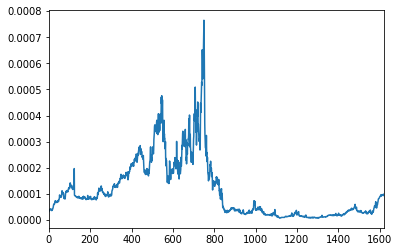

In [26]:
vic.plot()

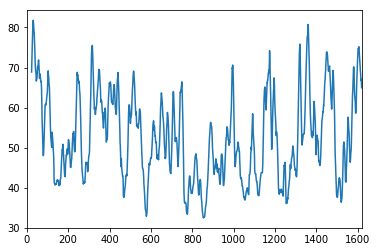

In [21]:
adx(14, vio, 10).plot()

In [47]:
data['position'] = None   
for row in range(len(via)):
    if sma(20, via)[row] > sma(40, via)[row] :
        data['position'].iloc[row] = 1
    elif sma(20, via)[row] > sma(40, via)[row] :
        data['position'].iloc[row] = -1
x = 1
data['position'].fillna(method='ffill',inplace=True)
for row in range(len(via)):
    if data['position'].iloc[row] == 1 :
        try:
            x += (via[row] - via[row-1])
        except:
            pass
    elif data['position'].iloc[row] == -1 :
        try:
            x -= (via[row] - via[row-1])
        except:
            pass
    else:
        pass    
x

1.0000090000000024

In [6]:
smavia = []
for n in range(100):
    smavia.append(sma(n, vbtc))
si = []
sn = []
xr = []
data['position'] = None   
for i in range(11):
    for n in range(21):
        for row in range(len(vbtc)):
            if i > n or i == 0 or i == 1:
                pass
            elif smavia[i][row] > smavia[n][row]:
                data['position'].iloc[row] = 1
            elif smavia[i][row] < smavia[n][row]:
                data['position'].iloc[row] = -1
        x = 1
        for row in range(len(vbtc)):
            if data['position'].iloc[row] == 1 :
                x += (vbtc[row] - vbtc[row-1])
            elif data['position'].iloc[row] == -1 :
                x -= (vbtc[row] - vbtc[row-1])
            else:
                pass
        si.append(i)
        sn.append(n)
        xr.append(x)
    print(max(xr), xr.index(max(xr)), si[xr.index(max(xr))], sn[xr.index(max(xr))])
data['position'].fillna(method='ffill',inplace=True)
print(max(xr), xr.index(max(xr)), si[xr.index(max(xr))], sn[xr.index(max(xr))])

1 0 0 0
1 0 0 0


C:\Users\Vincent\Miniconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1.0024103935740154 45 2 3
1.0024103935740154 45 2 3
1.0024103935740154 45 2 3
1.0024103935740154 45 2 3
1.0024103935740154 45 2 3
1.0024103935740154 45 2 3
1.0024103935740154 45 2 3
1.0024103935740154 45 2 3
1.0024103935740154 45 2 3
1.0024103935740154 45 2 3


In [ ]:
smavia = []
for n in range(100):
    smavia.append(sma(n, vbtc))
si = []
sn = []
xr = []
data['position'] = None   
for i in range(100):
    for n in range(100):
        for row in range(len(via)):
            if smavia[i][row] > smavia[n][row]:
                data['position'].iloc[row] = 1
            elif smavia[i][row] < smavia[n][row]:
                data['position'].iloc[row] = -1
        x = 1
        for row in range(len(via)):
            if data['position'].iloc[row] == 1 :
                x += (via[row] - via[row-1])
            elif data['position'].iloc[row] == -1 :
                x -= (via[row] - via[row-1])
            else:
                pass
        xr.append(x)
data['position'].fillna(method='ffill',inplace=True)
max(xr)
xr.index(max(xr))
si[xr.index(max(xr))]
sn[xr.index(max(xr))]

In [21]:
data['position'] = None
for row in range(len(via)):
    if sma(10, via)[row] > sma(20, via)[row]:
        data['position'].iloc[row] = 1
    elif sma(10, via)[row] < sma(20, via)[row]:
        data['position'].iloc[row] = -1
        
data['position'].fillna(method='ffill',inplace=True)
x = 1
for row in range(len(via)):
    if data['position'].iloc[row] == 1 :
        x += (via[row] - via[row-1])
    elif data['position'].iloc[row] == -1 :
        x -= (via[row] - via[row-1])
    else:
        pass
x

3.3755947378226296

In [ ]:
data['position'] = None
for row in range(len(vbtc)):
    if sma(10, vbtc)[row] > sma(20, vbtc)[row]:
        data['position'].iloc[row] = 1
    elif sma(10, vbtc)[row] < sma(20, vbtc)[row]:
        data['position'].iloc[row] = -1
        
data['position'].fillna(method='ffill',inplace=True)
x = 1
for row in range(len(vbtc)):
    if data['position'].iloc[row] == 1 :
        x += (vbtc[row] - vbtc[row-1])
    elif data['position'].iloc[row] == -1 :
        x -= (vbtc[row] - vbtc[row-1])
    else:
        pass
x

In [17]:
data['position'] = None
for row in range(len(via)):
    if via[row] == via[0]:
        pass
    elif via[row-1]<via[row]<(via[row-1]*1.005) and data['position'].iloc[row-1] != 1:
        data['position'].iloc[row] = 1
    elif data['position'].iloc[row-1] == 1:
        data['position'].iloc[row] = 1
    else:
        pass
data['position'].fillna(method='ffill',inplace=True)

x = 1
for row in range(len(via)):
    if data['position'].iloc[row] == 1 :
        x += (via[row] - via[row-1])
    else:
        pass
x

C:\Users\Vincent\Miniconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1.3258947936309515

In [28]:
#Long COMP A
real = []
reall = []
really = []
alldatao = []
data['Position'] = None
new = btc.rolling(16).mean()
alldatao = []
for n in range(95):
    data['Position'] = None
    x = 0
    y = 0
    z = 1
    try:
        for row in range(len(data)):
            if btc[row]>new[row]:
                if (row+n)%7 == 0 :
                    data['Position'].iloc[row] = 1
                elif (row+n)%13 == 0:
                    data['Position'].iloc[row] = 0
            else:
                if (row+n)%7 == 0 :
                    data['Position'].iloc[row] = 0
                elif (row+n)%13 == 0:
                    data['Position'].iloc[row] = 1
        data['Position'].fillna(method='ffill',inplace=True)
        for row in range(len(data)):
            try:
                if data['Position'].iloc[row-1] != 1 and data['Position'].iloc[row] == 1 :
                    x = int(row)
                elif data['Position'].iloc[row-1] == 1 and data['Position'].iloc[row] == 0 :
                    y = int(row)
                    z *= (btc[y]/btc[x])
            except:pass
    except:pass
    alldatao.append(z)    
real.append(max(alldatao))
reall.append(alldatao.index(max(alldatao)))
print(max(alldatao), alldatao.index(max(alldatao)), )
print("-----------------------------------")
print(max(real), reall[real.index(max(real))])
print("-----------------------------------")
"""
data['Position'] = None
for row in range(len(data)):
    if btc[row]>new[row]:
        if (row+alldatao.index(min(alldatao)))%7 == 0 :
            data['Position'].iloc[row] = 1
            x = int(row)
        elif (row+alldatao.index(min(alldatao)))%13 == 0:
            data['Position'].iloc[row] = 0
            y = int(row)
    else:
        if (row+alldatao.index(min(alldatao)))%7 == 0 :
            data['Position'].iloc[row] = 0
        elif (row+alldatao.index(min(alldatao)))%13 == 0:
            data['Position'].iloc[row] = 1  
data['Position'].fillna(method='ffill',inplace=True)
x = 0
y = 0
z = 1
for row in range(len(data)):
    try:
        if data['Position'].iloc[row-1] != 1 and data['Position'].iloc[row] == 1 :
            x = int(row)
        elif data['Position'].iloc[row-1] == 1 and data['Position'].iloc[row] == 0 :
            y = int(row)
            z *= (btc[y]/btc[x])
            print(x, y, z)
    except:
        pass
        
"""

2.1098224142122293 15
-----------------------------------
2.1098224142122293 15
-----------------------------------


"\ndata['Position'] = None\nfor row in range(len(data)):\n    if btc[row]>new[row]:\n        if (row+alldatao.index(min(alldatao)))%7 == 0 :\n            data['Position'].iloc[row] = 1\n            x = int(row)\n        elif (row+alldatao.index(min(alldatao)))%13 == 0:\n            data['Position'].iloc[row] = 0\n            y = int(row)\n    else:\n        if (row+alldatao.index(min(alldatao)))%7 == 0 :\n            data['Position'].iloc[row] = 0\n        elif (row+alldatao.index(min(alldatao)))%13 == 0:\n            data['Position'].iloc[row] = 1  \ndata['Position'].fillna(method='ffill',inplace=True)\nx = 0\ny = 0\nz = 1\nfor row in range(len(data)):\n    try:\n        if data['Position'].iloc[row-1] != 1 and data['Position'].iloc[row] == 1 :\n            x = int(row)\n        elif data['Position'].iloc[row-1] == 1 and data['Position'].iloc[row] == 0 :\n            y = int(row)\n            z *= (btc[y]/btc[x])\n            print(x, y, z)\n    except:\n        pass\n        \n"

In [29]:
alldatao

[0.40776531556406465,
 1.1357896886268,
 1.7613079811617334,
 0.45184934240582436,
 0.43061732229653205,
 0.240306897520418,
 0.6609986584388537,
 0.6065894141706382,
 0.9478219845195806,
 0.7097768157945701,
 0.2813098751862139,
 0.8781055966346858,
 0.36047448713217656,
 0.437405351420227,
 0.9698421558169689,
 2.1098224142122293,
 1.6778132872265366,
 0.5661680024505035,
 0.4298081494637038,
 0.36028023219057254,
 0.5214665157761633,
 0.51894698375791,
 0.6852668198944558,
 0.5133477864353224,
 0.2530094025600016,
 0.4178428442961783,
 0.21771904050391644,
 0.6689581097324796,
 1.1654764083932196,
 1.665925340741138,
 0.9058955196851622,
 0.49196434914825626,
 0.7643928287512421,
 0.4901775969512388,
 0.6957646151003055,
 0.4654939316622215,
 0.5644796801899262,
 0.8464595488227428,
 0.233537725660884,
 0.304751357461442,
 0.34020238152643173,
 0.7145088900121174,
 0.5659344676391878,
 0.9764610830321042,
 0.6469726288138341,
 0.4218720432431338,
 0.8795530886026799,
 0.300612132076

In [18]:
data['Position'] = None
for row in range(len(data)):
    if btc[row]>new[row]:
        if (row+alldatao.index(min(alldatao)))%7 == 0 :
            data['Position'].iloc[row] = 1
            x = int(row)
        elif (row+alldatao.index(min(alldatao)))%13 == 0:
            data['Position'].iloc[row] = 0
            y = int(row)
    else:
        if (row+alldatao.index(min(alldatao)))%7 == 0 :
            data['Position'].iloc[row] = 0
        elif (row+alldatao.index(min(alldatao)))%13 == 0:
            data['Position'].iloc[row] = 1  
data['Position'].fillna(method='ffill',inplace=True)
x = 0
y = 0
z = 1
for row in range(len(data)):
    try:
        if data['Position'].iloc[row-1] != 1 and data['Position'].iloc[row] == 1 :
            x = int(row)
        elif data['Position'].iloc[row-1] == 1 and data['Position'].iloc[row] == 0 :
            y = int(row)
            z *= (btc[y]/btc[x])
            print(x, y, z)
    except:
        pass

2 6 1.120689655172414
13 15 1.202293270840308
20 28 1.4122174927330602
34 54 2.3431004059493863
55 67 3.6871123139305064
69 83 2.137275273498701
90 93 2.0389755048221057
97 104 1.6054002537967154
118 119 1.617156642962029
125 132 1.5218822981053512
145 153 1.542791377765287
158 160 1.4304445184613535
174 184 1.4142396886950561
188 210 1.614590311260189
216 230 1.630576353945933
237 244 1.5801703271884386
251 262 1.6094535976851596
265 275 2.0146164894490393
279 288 2.8876169682102897
293 301 4.8481569097846435
307 328 3.573641433501052
335 340 3.9916171390129853
342 349 4.3581386283875485
363 370 4.224522862915263
379 384 2.9508972585691122
392 398 1.5324353641058717
405 412 1.4094793081463346
418 419 1.3920467639327834
431 433 1.4437540279320769
440 454 1.5096605019889844
457 461 1.4498590956669235
470 475 1.4261932931532035
482 483 1.4385540274314605
489 510 1.5268707981034497
524 531 1.4606399285961638
545 552 1.374526699070896
559 561 1.383864516320019
580 587 1.292884738325511
600

In [17]:
alldatao.index(max(alldatao))

83

In [27]:
btc[2222], new[2222]

(4120.5, 3854.6111111111136)

In [7]:
#Long COMP A
real = []
reall = []
really = []
alldatao = []
data['Position'] = None
for i in range(,15):
    new = btc.rolling(i).mean()
    alldatao = []
    for n in range(95):
        data['Position'] = None
        x = 0
        y = 0
        z = 1
        try:
            for row in range(len(data)):
                if btc[row]>new[row]:
                    if (row+n)%5 == 0 :
                        data['Position'].iloc[row] = 1
                    elif (row+n)%13 == 0:
                        data['Position'].iloc[row] = 0
                else:
                    if (row+n)%5 == 0 :
                        data['Position'].iloc[row] = 0
                    elif (row+n)%13 == 0:
                        data['Position'].iloc[row] = 1
            data['Position'].fillna(method='ffill',inplace=True)
            for row in range(len(data)):
                try:
                    if data['Position'].iloc[row-1] != 1 and data['Position'].iloc[row] == 1 :
                        x = int(row)
                    elif data['Position'].iloc[row-1] == 1 and data['Position'].iloc[row] == 0 :
                        y = int(row)
                        z *= (btc[y]/btc[x])
                except:pass
        except:pass
        alldatao.append(z)    
    real.append(max(alldatao))
    reall.append(alldatao.index(max(alldatao)))
    really.append(i)
    print(max(alldatao), alldatao.index(max(alldatao)), i)
print("-----------------------------------")
print(max(real), reall[real.index(max(real))], really[real.index(max(real))])
print("-----------------------------------")
data['Position'] = None
sma = btc.rolling(really[real.index(max(real))]).mean()
for row in range(len(data)):
    if btc[row]>sma[row]:
        if (row+reall[real.index(max(real))])%5 == 0 :
            data['Position'].iloc[row] = 1
            x = int(row)
        elif (row+reall[real.index(max(real))])%13 == 0:
            data['Position'].iloc[row] = 0
            y = int(row)
    else:
        if (row+reall[real.index(max(real))])%5 == 0 :
            data['Position'].iloc[row] = 0
        elif (row+reall[real.index(max(real))])%13 == 0:
            data['Position'].iloc[row] = 1  
data['Position'].fillna(method='ffill',inplace=True)
x = 0
y = 0
z = 1
for row in range(len(data)):
    try:
        if data['Position'].iloc[row-1] != 1 and data['Position'].iloc[row] == 1 :
            x = int(row)
        elif data['Position'].iloc[row-1] == 1 and data['Position'].iloc[row] == 0 :
            y = int(row)
            z *= (btc[y]/btc[x])
            print(x, y, z)
    except:
        pass

3477.2141713101983 18 5
3585.015607100074 18 6
5279.272107367859 18 7
2995.73296327425 18 8
1316.3188495499817 44 9
1264.6564001368195 44 10
1321.9823411535822 5 11
1407.2480656175228 5 12
1888.0858238058033 44 13
2664.429840796638 44 14
-----------------------------------
5279.272107367859 18 7
-----------------------------------
7 8 1.0355329949238579
12 21 1.2284263959390862
22 34 1.4045610630038818
37 60 2.910901913181958
62 73 5.287829462671938
87 97 5.81410632862507
99 102 6.344650368019832
107 112 6.1559819203726835
117 127 6.499102224131162
138 142 6.113924952145966
147 151 6.0913435118795
164 177 8.040223860730473
182 190 8.792673832975492
192 197 8.641798590846264
202 203 8.878344172712495
207 212 9.277634783654591
217 227 9.2920410488466
232 237 9.272043829946643
247 252 8.21066516258774
257 268 10.175662348037678
272 281 10.586698955199791
282 294 21.57523606193247
297 312 46.905123594383056
320 327 38.78476977080705
333 346 56.08174606265096
347 357 52.01945342876425
359 3

In [15]:
data['Position'] = None
new = btc.rolling(9).mean()
news = btc.rolling(20).mean()
for row in range(len(data)):
    if btc[row]>new[row]:
        data['Position'].iloc[row] = 1
    else:
        data['Position'].iloc[row] = 0
data['Position'].fillna(method='ffill',inplace=True)
x = 0
y = 0
z = 1
for row in range(len(data)):
    if data['Position'].iloc[row-1] != 1 and data['Position'].iloc[row] == 1 :
        x = int(row)
    elif data['Position'].iloc[row-1] == 1 and data['Position'].iloc[row] == 0 :
        y = int(row)
        z *= (btc[y]/btc[x])
        print(x, y, z)

0 0 1.0
8 78 6.122549019607844
85 94 7.189782334952331
96 98 5.811740720753134
106 111 5.7396091869849215
112 127 6.473394599681769
146 152 6.1596792975536685
168 176 6.306671644427107
181 197 6.801441909418774
200 224 8.582771933314167
231 239 8.159975286352877
246 252 7.320765574189671
256 257 7.21451353392567
258 276 9.968184999988141
277 316 53.30015981385636
321 322 47.432346921511524
324 327 38.47549148767785
334 349 47.46857117219256
350 354 47.51913420071002
357 358 46.12062164507926
361 366 44.27057995152403
367 369 43.464403937838625
375 376 42.47958161007474
396 397 23.82800515845585
399 409 24.47482843117738
410 411 23.928341033990005
416 418 23.253439107390285
437 442 19.58666815747329
446 454 19.97561746243984
456 457 18.54622089007257
469 470 18.321921690058254
471 473 17.81606391949099
476 481 17.868393072440238
482 502 23.756924590534968
503 504 23.30033940163817
515 516 22.821671064029964
520 528 23.609932037347505
529 530 23.11641024113041
534 537 22.583151291026912


In [ ]:
"""
https://www.investing.com/crypto/bitcoin/historical-data
21 28
1150.1268364950324 50 158
1150.1268364950324 50 159
1150.1268364950324 50 160
1150.1268364950324 50 161
1166.31546331617 50 210
1166.31546331617 50 211
1166.31546331617 50 212

7 13
2015.3131996515497 83 43
7577.307527194208 83 20
8594.780228620992 83 10
9359.106371868913 83 16
10875.237952718673 83 9

5 13
5279.272107367859 18 7

7 11
7246.876953139464 13 16


"""